In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz
from fiftyone import ViewField as F

In [1]:
import numpy as np
import pandas as pd

/var/folders/k2/br7l8y790t39kyllbbpq37_h0000gn/T/ipykernel_10849/1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dataset = foz.load_zoo_dataset("quickstart-geo")
session = fo.launch_app(dataset)
print(dataset.head())

NameError: name 'foz' is not defined

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 850.3 kB/s eta 0:00:000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 3.0 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 5.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 10.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 8.2 MB/s eta 0:00:00:00:01

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [4]:
dataset = foz.load_zoo_dataset("quickstart-geo")
session = fo.launch_app(dataset)
print(dataset.head())

NameError: name 'foz' is not defined

In [5]:
import fiftyone as fo
import fiftyone.brain as fob
import fiftyone.zoo as foz
from fiftyone import ViewField as F

dataset = foz.load_zoo_dataset("quickstart-geo")
fob.compute_uniqueness(dataset)

# A list of ``[longitude, latitude]`` coordinates
locations = dataset.values("location.point.coordinates")
# Scalar `uniqueness` values for each sample
uniqueness = dataset.values("uniqueness")
# The number of ground truth objects in each sample
num_objects = dataset.values(F("ground_truth.detections").length())
# Create scatterplot of the locations of the places 
plot = fo.location_scatterplot(
    locations=locations,
    labels=uniqueness,      # color points by their `uniqueness` values
    sizes=num_objects,      # scale point sizes by number of objects
    labels_title="uniqueness",
    sizes_title="objects",
)
plot.show()

 100% |████|  223.5Mb/223.5Mb [2.6s elapsed, 0s remaining, 95.2Mb/s]      
Extracting dataset...
Parsing dataset metadata
Found 500 samples
Dataset info written to '/Users/qasimaskari/fiftyone/quickstart-geo/info.json'
Migrating database to v0.24.1
Loading 'quickstart-geo'
 100% |█████████████████| 500/500 [13.0s elapsed, 0s remaining, 36.9 samples/s]      
Dataset 'quickstart-geo' created
 100% |████|  100.6Mb/100.6Mb [1.0s elapsed, 0s remaining, 102.7Mb/s]        
Computing embeddings...
 100% |█████████████████| 500/500 [12.2s elapsed, 0s remaining, 42.0 samples/s]      
Computing uniqueness...
Uniqueness computation complete


ImportError: Please install ipywidgets>=7.0.0 to use the FigureWidget class

In [6]:
pip install "ultralytics>=8.1.0" "torch>=1.8"


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import os; os.environ["YOLO_VERBOSE"] = "False"
import fiftyone as fo
import fiftyone.zoo as foz
import fiftyone.utils.ultralytics as fou
from ultralytics import YOLO

# Load an example dataset
dataset = foz.load_zoo_dataset("quickstart-geo", max_samples=25)
dataset.select_fields().keep_fields()

Dataset already downloaded
Loading 'quickstart-geo'
 100% |███████████████████| 25/25 [637.6ms elapsed, 0s remaining, 39.4 samples/s]      
Dataset 'quickstart-geo-25' created


In [12]:
import fiftyone as fo
import fiftyone.zoo as foz

##Location has been focused to the area of manhattan 
MANHATTAN = [
    [
        [-73.949701, 40.834487],
        [-73.896611, 40.815076],
        [-73.998083, 40.696534],
        [-74.031751, 40.715273],
        [-73.949701, 40.834487],
    ]
]
##loading the quickstart-geo 
dataset = foz.load_zoo_dataset("quickstart-geo")

# Create a view that only contains samples in Manhattan
view = dataset.geo_within(MANHATTAN)

Dataset already downloaded
Loading existing dataset 'quickstart-geo'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


 100% |█████████████████| 500/500 [2.0m elapsed, 0s remaining, 4.2 samples/s]      



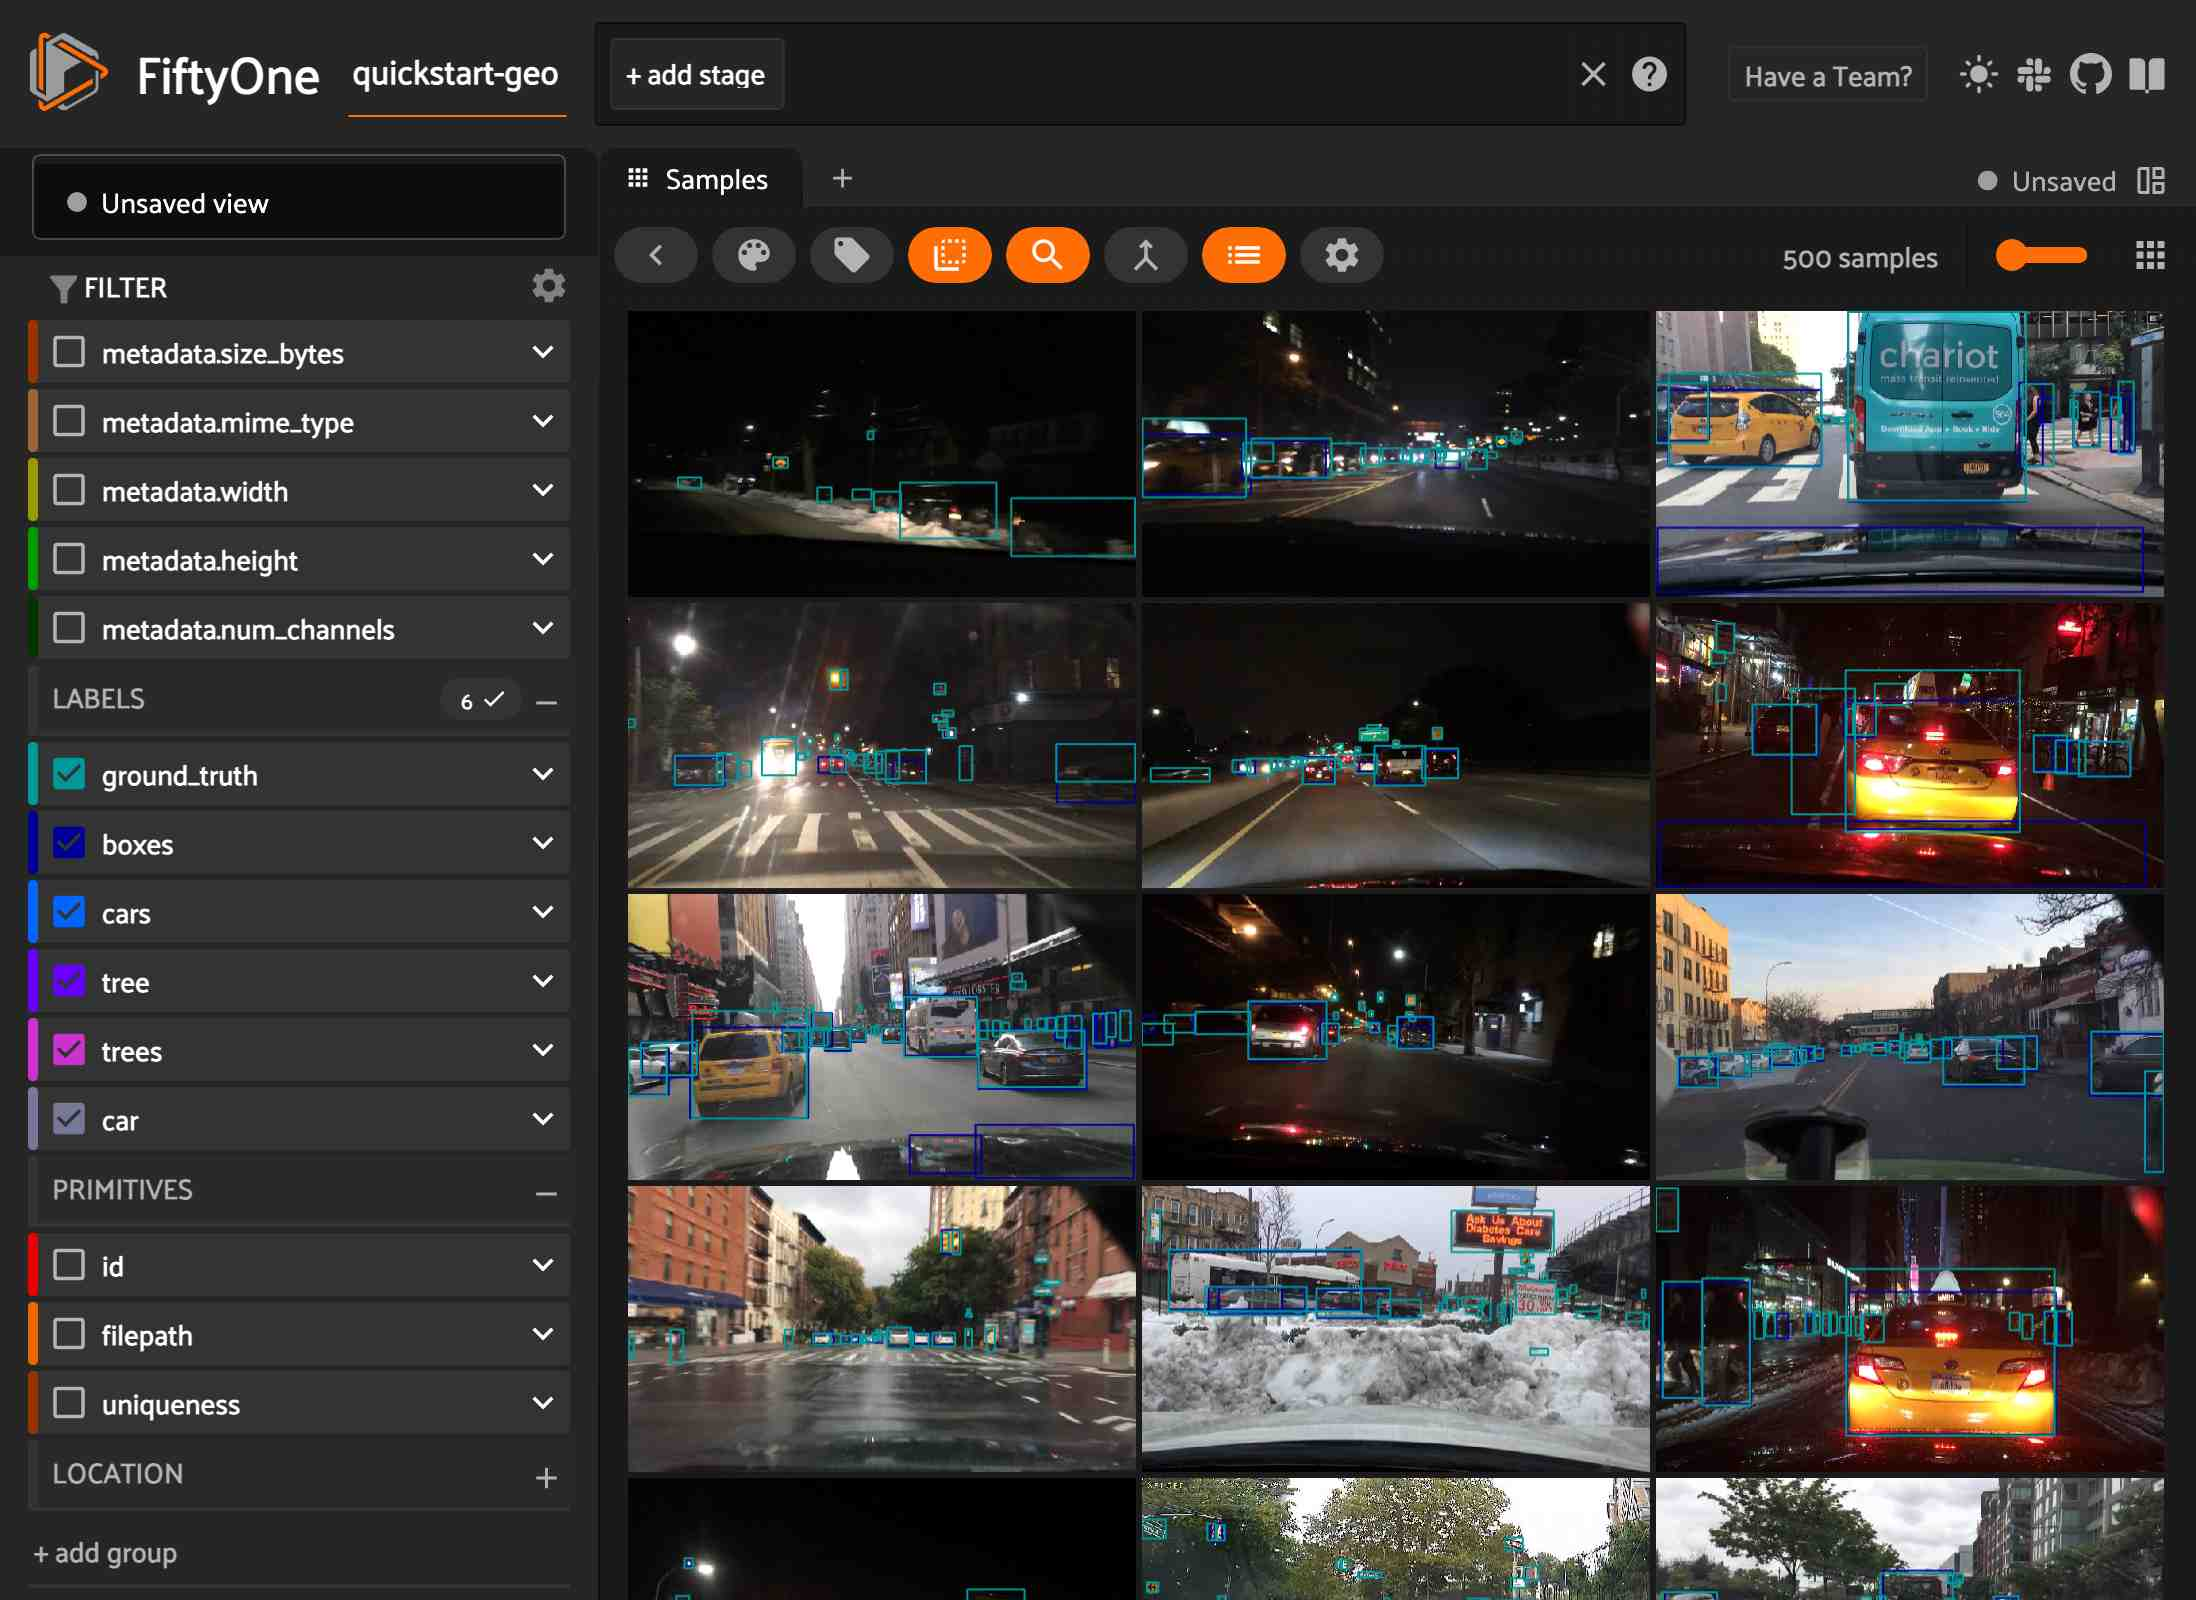

   0% |/----------------|   0/500 [1.2s elapsed, ? remaining, ? samples/s]   


AttributeError: Sample has no field 'display'

In [22]:
# YOLOv8
model = YOLO("yolov8s.pt")

dataset.apply_model(model, label_field="boxes")

session = fo.launch_app(dataset)
for sample in dataset.iter_samples(progress=True):
    result = model(sample.filepath)[0]
    sample["car"] = fou.to_detections(result)
    sample.save()
    sample.display()

In [3]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 351.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 9.1 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.6/402.6 kB 8.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.8/415.8 kB 8.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 12.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
##Using Hugging Face & transformers 
import fiftyone as fo
import fiftyone.zoo as foz
dataset =  foz.load_zoo_dataset("quickstart-geo")

model = foz.load_zoo_model(
    "zero-shot-detection-transformer-torch",
    name_or_path="google/owlvit-base-patch32",  # HF model name or path
    classes=["plant", "tree", "car"]
)
dataset.apply_model(model, label_field="owl", confidence_thresh=0.05)

Dataset already downloaded
Loading existing dataset 'quickstart-geo'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use
 100% |█████████████████| 500/500 [7.5m elapsed, 0s remaining, 1.0 samples/s]      


In [6]:
session = fo.launch_app(dataset, auto =False)

Session launched. Run `session.show()` to open the App in a cell output.


In [7]:
dataset.apply_model?

Signature:
dataset.apply_model(
    model,
    label_field='predictions',
    confidence_thresh=None,
    store_logits=False,
    batch_size=None,
    num_workers=None,
    skip_failures=True,
    output_dir=None,
    rel_dir=None,
    progress=None,
    **kwargs,
)
Docstring:
Applies the model to the samples in the collection.

This method supports all of the following cases:

-   Applying an image model to an image collection
-   Applying an image model to the frames of a video collection
-   Applying a video model to a video collection

Args:
    model: a :class:`fiftyone.core.models.Model`, Hugging Face
        transformers model, Ultralytics model, SuperGradients model, or
        Lightning Flash model
    label_field ("predictions"): the name of the field in which to
        store the model predictions. When performing inference on video
        frames, the "frames." prefix is optional
    confidence_thresh (None): an optional confidence threshold to apply
        to any applicab